<a href="https://colab.research.google.com/github/suy379/do_it_DL_intro/blob/main/03_%EC%84%A0%ED%98%95_%ED%9A%8C%EA%B7%80(%EC%88%98%EC%B9%98%EC%98%88%EC%B8%A1)%2B%EA%B2%BD%EC%82%AC%ED%95%98%EA%B0%95%EB%B2%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. 선형 회귀 딥러닝(수치 예측: Regression)
- 03-1. 데이터 준비하기
- 03-2. 경사 하강법
- 03-3. 손실 함수와 경사 하강법의 관계
- 03-4. 선형 회귀를 위한 뉴런 만들기 

### 03-1. 데이터 준비하기(sklearn 당뇨병 환자 데이터)
- 목표: 당뇨병 환자의 1년 후 병의 진전된 정도를 예측하는 모델
- 데이터 준비 시 지금은 훈련 데이터(train set)로 **data의 3번째 특성, target**을 사용하고
- 예측 시엔 그냥 데이터 1개를 임의로 넣어서 예측해봄.

In [ ]:
from sklearn.datasets import load_diabetes
dia = load_diabetes()

In [ ]:
print(dia.keys())

dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])


In [ ]:
print(dia['data'].shape, dia['target'].shape)

(442, 10) (442,)


In [ ]:
dia.data[:3]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632783, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567061, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286377, -0.02593034]])

In [ ]:
dia.target[:3]

array([151.,  75., 141.])

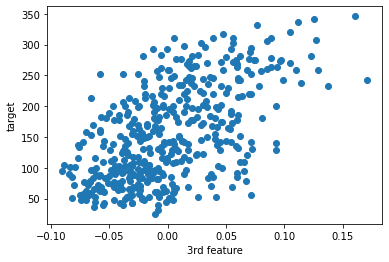

In [ ]:
#당뇨병 환자 데이터 시각화하기(data의 3번쨰 특성과 target 간)
import matplotlib.pyplot as plt

x = dia.data[:, 2]
y = dia.target
plt.scatter(x,y)
plt.xlabel('3rd feature')
plt.ylabel('target')
plt.show() #x와 y 간 정비례 관계가 보임.

In [ ]:
#훈련 데이터 준비하기
x = dia.data[:, 2]
y = dia.target

### 03-2. 경사 하강법으로 훈련 데이터 학습하기
- 우리의 목표는 데이터에 잘 맞는 최적의 회귀선을 찾는 것.(즉, 회귀선의 파라미터:w, b를 찾는 것)

In [ ]:
#훈련 데이터에 딱 맞는 기울기(w)와 절편(b)를 찾아보자.

#1. w, b 초기화(그냥 임의로 정함.)
w = 1.0
b = 1.0

In [ ]:
#2. x 전체에 대해 계산하면 너무 많으므로 첫 번째 x에 대해서만 계산해보자.
#y_hat = w*x + b
y_hat = w*x[0]+b
print(y_hat) #예측값 

1.0616962065186886


In [ ]:
#하지만 실제 값은.. 너무 값이 많이 차이난다ㅋㅋ
print(y[0]) #실제값 

151.0


In [ ]:
#3. w값을 조정하여 예측값 바꾸기(y_hat과 y 값의 차가 최소화되도록!!)
#How? w와 b를 조금씩 변경하여 y_hat이 증가하는지 or 감소하는지를 살펴보자.(왜냐하면 w값을 올렸을때 y_hat이 증가하면 w값을 올려야하고, 만일 y_hat이 감소하면 w값을 내려야 하기 때문!)
w_inc = w+0.1 #w값을 올렸을 때 
y_hat_inc = w_inc*x[0]+b #y_hat은 조금 더 증가함. --> y_hat과 y값의 차를 감소시키려면 w값을 올려야 하는군!
print(y_hat_inc)

1.0678658271705574


In [ ]:
#w값을 조정한 후 예측값이 얼마나 증가하는지(몇 배 정도?) 알아보자.
#w가 0.1 증가 시 y_hat이 얼마나 증가? (=y_hat 증가분/w의 증가분)
(y_hat_inc-y_hat)/(w_inc - w)

0.061696206518688734

In [ ]:
print(x[0])

0.0616962065186885


- 매우 독특하게도, x[0]에 대해 w를 0.1 증가 시 y_hat은 0.06169... 가 증가하는데, 바로 증가분의 비를 계산하면 x[0]가 다시 나온다!
- 즉, w_rate = x[0]
- **주목!! 변화율(w_rate)의 값이 양수 -> w 증가 시 y_hat 증가  / w_rate값이 음수 -> w 증가 시 y_hat 감소(w 감소 시 y_hat 증가)**
- 그렇다면 y와 y_hat의 값의 차를 가장 최소화하려면 = y_hat의 값을 증가시켜야 하고 = 그럼 w_rate 값에 따라 w를 증가 or 감소시켜야 함 = 어차피 w_rate가 양수, 음수니까 그냥 w에 w_rate를 더하는 방식으로 업데이트 하면 된다!

In [ ]:
#그러므로 w를 업데이트 하는 방법은 
w_rate = (y_hat_inc-y_hat)/(w_inc - w) #x[0]에 대해서만 한거지만 이를 전체 x에 대해서 적용시키자!
w_new = w + w_rate
print(w_new)

1.0616962065186888


#### 변화율(w_rate)로 절편 업데이트하기
- 앞에서 가중치 업데이트는 w = w+w_rate로 업데이트한다고 배웠다.
- 그럼 절편(b)는 어떻게 업데이트할까?

In [ ]:
#앞에서 한거랑 동일하게, 절편(b)를 업데이트하면 y_hat이 얼마 더 증가하는지를 알아보자.
b_inc = b + 0.1
y_hat_inc = w*x[0] + b_inc
y_hat_inc

1.1616962065186887

In [ ]:
#증가율 계산
b_rate = (y_hat_inc - y_hat)/(b_inc - b)
print(b_rate) #여기서 변화율은 양수이므로, b가 증가하면 y_hat도 증가한다. --> 그리고 이 예제에선 변수가 1개인 1차함수이므로 b가 0.1 증가시 y_hat도 똑같이 0.1 증가하는 게 당연하다.
                    #여기선 그냥 b_rate =1로 두자.

1.0


### 오차 역전파
- 만일 y와 y_hat의 차가 너무 클 때는 y_hat의 값을 훨씬 키워야 하는데 그 땐 어쩌지?
- 그리고 지금은 y_hat<y지만 y_hat>y가 되면 어쩌지?
- 방법: 오차 역전파(즉, 가중치 업데이트 시 변화율에 오차율을 곱해주자! w= w+w_rate*err 도 해주자!) 여기서 err = (y-y_hat)

In [ ]:
#x[0]일 떄의 예시
err = y[0] - y_hat
w_new = w + w_rate*err
b_new = b + 1*err #b_rate =1 으로 설정하였으므로
print(w_new, b_new)

10.250624555904514 150.9383037934813


In [ ]:
#x[1]일 때는
y_hat = x[1]*w_new + b_new #앞서 업데이트한 새로운 w,b값을 대입
err = y[1]-y_hat
w_rate = x[1]

w_new = w_new + w_rate*err
b_new = b_new + 1*err
print(w_new, b_new)

14.132317616381767 75.52764127612664


In [ ]:
#위의 방식으로 모든 x 데이터에 대해 위의 과정을 적용
w=1.0
b=1.0
for xi, yi in zip(x,y):
    y_hat = xi*w + b
    err = yi-y_hat
    w_rate =xi

    w = w + w_rate*err
    b = b + 1*err

print(w,b)

587.8654539985689 99.40935564531424


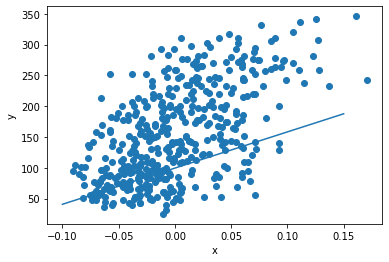

In [ ]:
#위에서 찾아낸 w,b가 최적의 값인지 그래프를 그려 알아보자.
import matplotlib.pyplot as plt
plt.scatter(x,y) #원 데이터인 x,y를 흩뿌림 
pt1=(-0.1, -0.1*w+b) #x의 시작(-0.1), 이때의 y값
pt2=(0.15, 0.15*w+b) #x의 시작(0.15), 이때의 y값 
plt.plot([pt1[0],pt2[0]],[pt1[1],pt2[1]]) #plot([x좌표],[y좌표])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

- 모든 x, y 데이터에 대해 가중치 업데이트한 결과, 퍼펙트한 결과를 얻진 못함.
- 이런 경우에는 업데이트를 더 많이! 하는 것이 좋다.

In [ ]:
#가중치 업데이트 반복하기(에포크 이용)
w=1.0
b=1.0

for i in range(1, 100):
    for xi, yi in zip(x,y):
        y_hat = xi*w + b
        err = yi-y_hat
        w_rate =xi

        w = w + w_rate*err
        b = b + 1*err

print(w, b) #아까 1번만 했을 때보다 업데이트된 값이 많이 차이남.

913.5973364345905 123.39414383177204


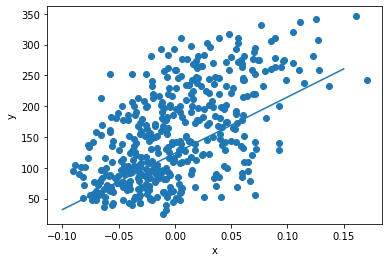

In [ ]:
plt.scatter(x,y) #원 데이터인 x,y를 흩뿌림 
pt1=(-0.1, -0.1*w+b) #x의 시작(-0.1), 이때의 y값
pt2=(0.15, 0.15*w+b) #x의 시작(0.15), 이때의 y값 
plt.plot([pt1[0],pt2[0]],[pt1[1],pt2[1]]) #plot([x좌표],[y좌표])
plt.xlabel('x')
plt.ylabel('y')
plt.show() #위의 코드로 다시 실행해보면 직선이 데이터를 보다 더 잘 반영하고 있다!

In [ ]:
#에폭 횟수를 늘릴수록 가중치를 더 적절하게 업데이트함.
w=1.0
b=1.0

for i in range(1, 1000):
    for xi, yi in zip(x,y):
        y_hat = xi*w + b
        err = yi-y_hat
        w_rate =xi

        w = w + w_rate*err
        b = b + 1*err

print(w, b) 

913.5973364345905 123.39414383177204


### 모델 예측하기
- 앞에서 나온 결과를 바탕으로, 최적의 파라미터 값은 약 w=913.6, b=123.4라고 할 수 있다.
- 즉, y_hat = 913.6*x +123.4
- 이제 새로운 x값이 들어왔을 때 y값을 y_hat으로 예측할 수 있다!

In [ ]:
x_new = 0.18
y_pred = w*x_new + b
print(y_pred)

287.8416643899983


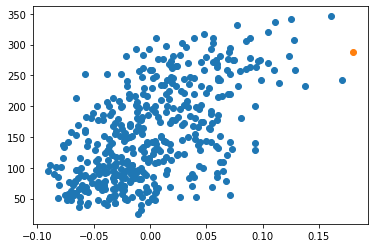

In [ ]:
#위의 결과를 산점도 위에 나타내면
plt.scatter(x, y)
plt.scatter(x_new, y_pred)

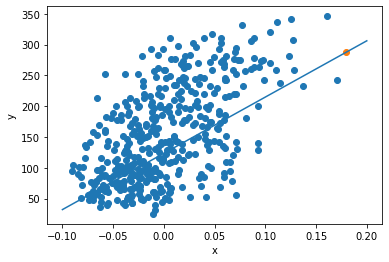

In [ ]:
plt.scatter(x, y)
plt.scatter(x_new, y_pred)

pt1=(-0.1, -0.1*w+b) #x의 시작(-0.1), 이때의 y값
pt2=(0.2, 0.2*w+b) #x의 시작(0.15), 이때의 y값 
plt.plot([pt1[0],pt2[0]],[pt1[1],pt2[1]]) #plot([x좌표],[y좌표])
plt.xlabel('x')
plt.ylabel('y')

plt.show()

### 03-4. 선형 회귀를 위한 뉴런 만들기

In [ ]:
#앞서 구현한 for문을 이용한 경사 하강법 
w=1.0
b=1.0

for i in range(1, 1000): #에폭 부분을 클래스를 이용하면 쉽다. -> 에폭을 객체를 찍을 때 지정할 수 있기 때문.
    for xi, yi in zip(x,y):
        y_hat = xi*w + b
        err = yi-y_hat
        w_rate =xi

        w = w + w_rate*err
        b = b + 1*err

print(w, b) 

In [ ]:
#앞의 과정을 파이썬 클래스(뉴런)로 만들어 원하는 만큼 객체를 찍어내자.
class Neuron:
    def __init__(self):
        #앞으로 w와 b값은 업데이트를 통해 값을 바꿀 것이므로 클래스 변수로 저장하진 않음.
        self.w = 1.0
        self.b = 1.0
    
    def forpass(self, x): #정방향 계산(y_hat을 구해주는 함수)
        y_hat = self.w*x + self.b 
        return y_hat 

    def backprop(self, x, err): #역방향 계산(가중치와 절편의 그레디언트를 구해주는 함수)
        w_grad = x*err
        b_grad = 1*err 
        return w_grad, b_grad 

    def fit(self, x, y, epochs=100): #실질적으로 우리가 사용하게 될 함수.
    #그리고 객체 찍을 때 앞의 forpass, backprop 함수도 적용할 필욘 x. 왜냐면 fit함수 안에 다 저 함수들을 적용시켰기 때문! 
        for i in range(epochs):
            for xi, yi in zip(x,y):
                y_hat = self.forpass(xi)
                err = -(yi - y_hat)
                w_grad, b_grad = self.backprop(xi, err)
                self.w -= w_grad
                self.b -= b_grad 
        return self.w, self.b


In [ ]:
#객체
neuron = Neuron()
#학습
neuron.fit(x, y, 500)

(913.5973364345905, 123.39414383177204)

In [ ]:
#최적의 파라미터 w, b는 다음과 같이 구할 수도 있다.
print(neuron.w, neuron.b)

913.5973364345905 123.39414383177204


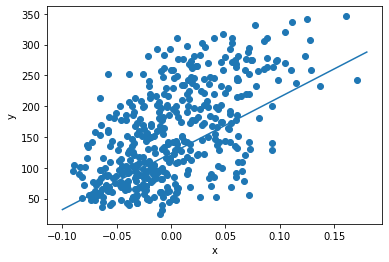

In [ ]:
#학습이 잘 되었는지 그래프로 확인
plt.scatter(x,y)

pt1 = (-0.1, -0.1*neuron.w+neuron.b)
pt2 = (0.18, 0.18*neuron.w+neuron.b)
plt.plot([pt1[0], pt2[0]],[pt1[1], pt2[1]])

plt.xlabel('x')
plt.ylabel('y')
plt.show()